In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from xgboost import XGBRegressor

In [27]:
data=pd.read_csv('TRAIN.csv')
data.head()

,AT,V,AP,RH,PE
0,22.85,60.29,1017.29,61.92,448.58
1,11.75,35.76,1018.99,57.92,473.01
2,12.24,44.90,1020.31,82.22,464.25
3,13.43,40.10,1015.82,87.90,471.77
4,4.65,35.19,1018.23,94.78,489.36


In [28]:
data.shape

(8000, 5)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      8000 non-null   float64
 1   V       8000 non-null   float64
 2   AP      8000 non-null   float64
 3   RH      8000 non-null   float64
 4   PE      8000 non-null   float64
dtypes: float64(5)
memory usage: 312.6 KB


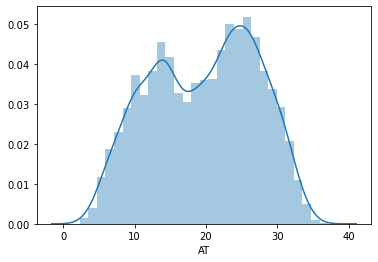

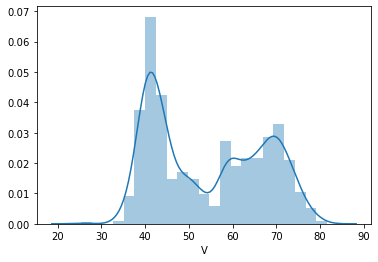

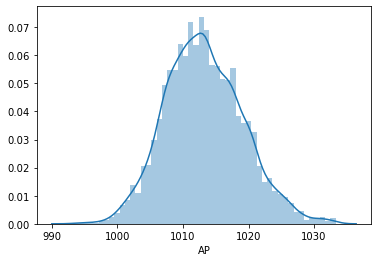

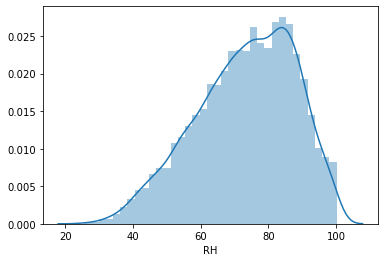

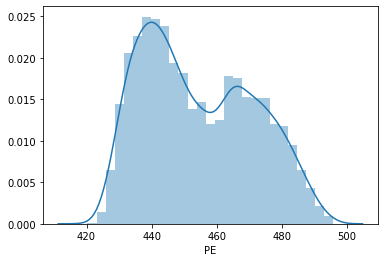

In [30]:
for feature in data.columns:
    sns.distplot(data[feature])
    plt.show()

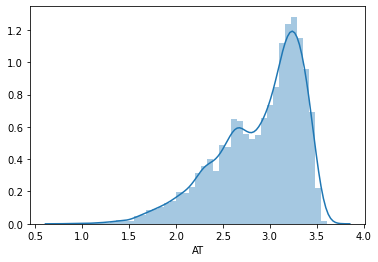

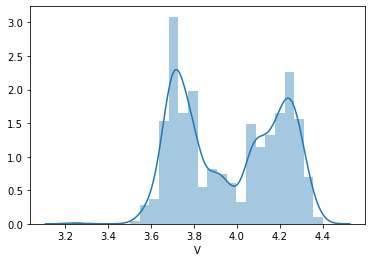

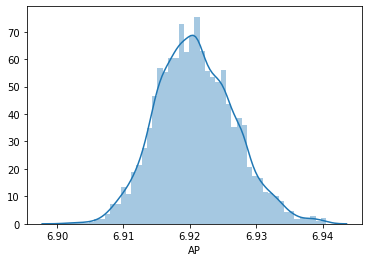

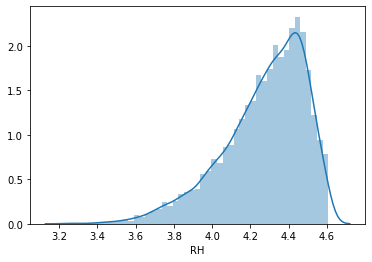

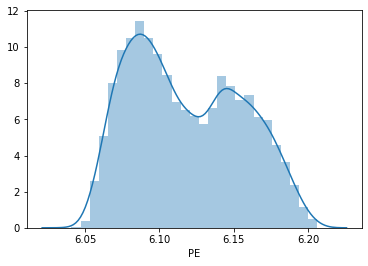

In [31]:
for feature in data.columns:
    df=data.copy()
    df[feature]=np.log(df[feature])
    sns.distplot(df[feature])
    plt.show()

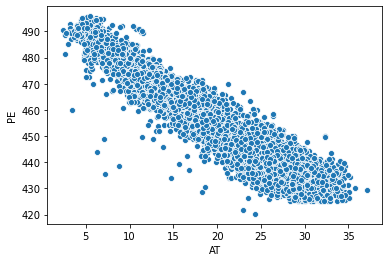

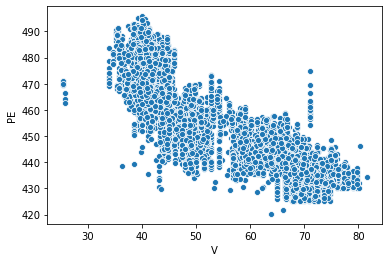

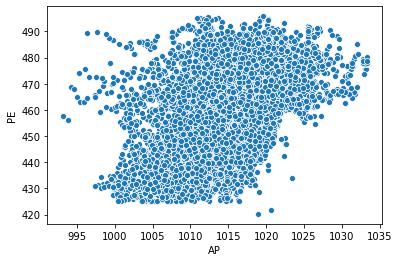

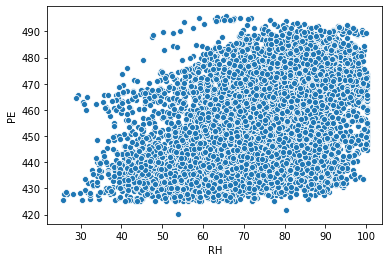

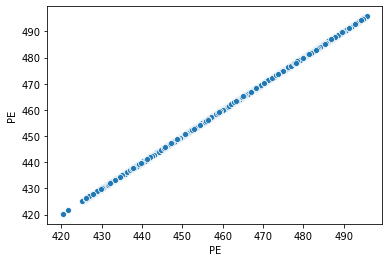

In [32]:
for feature in data.columns:
    sns.scatterplot(data[feature],data['PE'])
    plt.show()

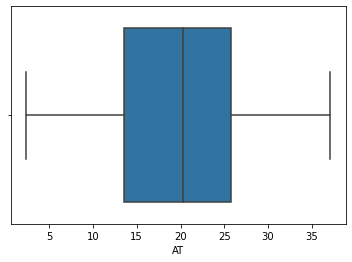

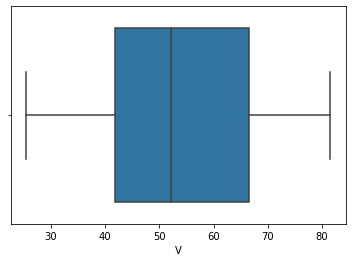

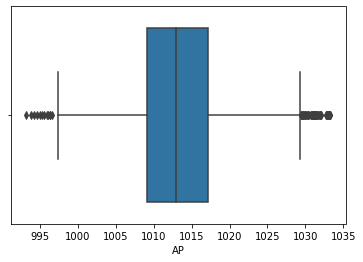

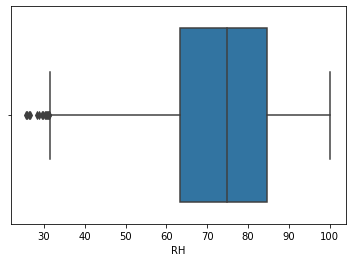

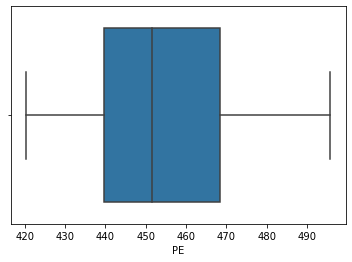

In [33]:
for feature in data.columns:
    sns.boxplot(data[feature])
    plt.show()

In [34]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.843584,-0.505347,-0.538296,-0.947512
V,0.843584,1.000000,-0.409484,-0.308251,-0.872138
AP,-0.505347,-0.409484,1.000000,0.100138,0.516904
RH,-0.538296,-0.308251,0.100138,1.000000,0.386323
PE,-0.947512,-0.872138,0.516904,0.386323,1.000000


In [35]:
upper_limit=data['AP'].mean() +3*data['AP'].std()
upper_limit

1030.9981070542083

In [36]:
lower_limit=data['AP'].mean() -3*data['AP'].std()
lower_limit

995.472960445796

In [37]:
data[(data['AP']>upper_limit)|(data['AP']<lower_limit)]

,AT,V,AP,RH,PE
75,9.87,41.82,1033.04,68.57,475.58
295,14.31,42.86,1031.14,69.60,465.36
594,9.99,41.82,1033.14,68.36,475.75
655,6.45,40.02,1032.08,79.70,481.36
933,6.86,40.02,1031.50,77.94,476.45
972,7.50,40.02,1031.39,82.53,476.01
985,9.15,41.82,1032.88,75.11,477.78
1237,8.96,40.02,1031.21,82.32,475.47
1313,9.66,41.82,1033.19,73.19,477.67
1891,14.34,42.86,1031.75,66.81,466.17


In [38]:
data['AP']=data[(data.AP<upper_limit)&(data.AP>lower_limit)]

In [39]:
data.dropna(inplace=True)

In [40]:
upper_limit=data['RH'].mean() +3*data['RH'].std()
upper_limit

117.08382436432575

In [41]:
lower_limit=data['RH'].mean() -3*data['RH'].std()
lower_limit

29.41012889026066

In [42]:
data[(data['RH']>upper_limit)|(data['RH']<lower_limit)]

,AT,V,AP,RH,PE
427,33.94,74.67,33.94,28.16,427.98
2703,34.65,74.67,34.65,26.67,427.69
4724,34.24,74.67,34.24,25.56,425.58
5156,34.30,74.67,34.30,25.89,427.84
5521,35.01,74.67,35.01,26.30,428.48
5696,19.32,44.71,19.32,28.81,464.38


In [43]:
data['RH']=data[(data.RH<upper_limit)&(data.RH>lower_limit)]

In [44]:
data.dropna(inplace=True)

In [45]:
data.shape

(7952, 5)

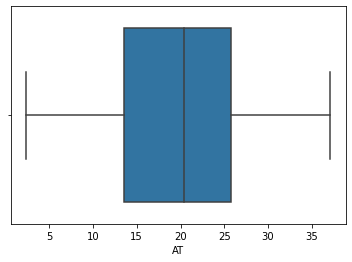

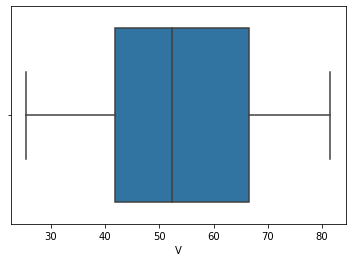

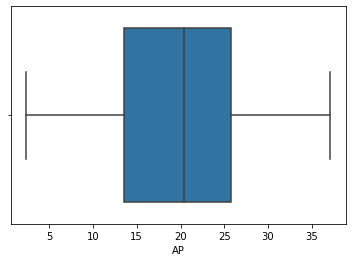

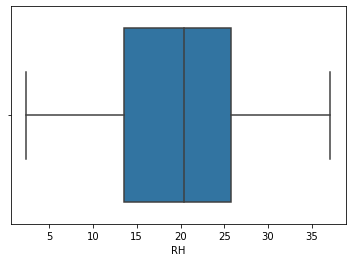

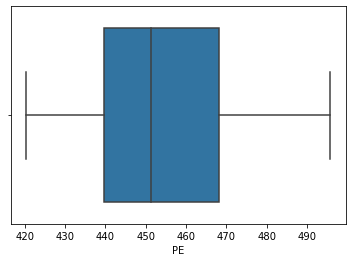

In [46]:
for feature in data.columns:
    sns.boxplot(data[feature])
    plt.show()

In [47]:
df_train=data.copy()

In [48]:
df=pd.read_csv('TEST.csv')

In [49]:
df_ind=df_train.drop(['PE'],axis=1)
df_dep=df_train['PE']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(df_ind,df_dep,test_size=0.3,random_state=42)

In [80]:
RF=RandomForestRegressor()

In [81]:
RF.fit(x_train,y_train)

RandomForestRegressor()

In [82]:
pred=RF.predict(x_test)
r2_score(y_test,pred)

0.9494467849353466

In [83]:
mse=mean_squared_error(y_test,pred)
print(mse**(1/2.0))

3.8358728339796313


In [50]:
XGB=XGBRegressor()

In [52]:
params={
    "learning_rate" : [0.01, 0.05, 0.10],
    "max_depth" : [3,10,20,30,40],
    "min_child_weight" : [1, 3, 50, 100],
    "gamma" : [0.0, 0.1,0.4],
    "colsample_bytree" : [0.1,0.3,0.5, 0.7,0.9],
    "n_estimators" : [42, 100, 400,600]
    
}

In [53]:
random=RandomizedSearchCV(XGB,param_distributions=params,scoring="neg_mean_squared_error",cv=5,n_jobs=5,verbose=0)

In [54]:

random.fit(df_ind,df_dep)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                          tree_met

In [55]:
random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=30,
             min_child_weight=100, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
XGB=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=30,
             min_child_weight=100, monotone_constraints='()',
             n_estimators=600, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
XGB.fit(df_ind,df_dep)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=30,
             min_child_weight=100, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
pred=XGB.predict(df)


In [58]:
index=np.arange(len(pred))

In [59]:
d=pd.DataFrame(index)

In [60]:
pred=pd.DataFrame(pred)
data=pd.concat([d,pred],axis=1)
data.columns=['Index','Value']
data.to_csv('submission2.csv',index=False)